In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scienceplots
from collections import defaultdict

In [22]:
# Establish style and parameters for the plots
plt.style.use(['science', 'grid'])
plt.rcParams['figure.dpi'] = 500
plt.rcParams.update({
    'font.size'         : 22,
    'axes.titlesize'    : 22,  
    'axes.labelsize'    : 22,
    'xtick.labelsize'   : 22,
    'ytick.labelsize'   : 22,
})

#Color palette
paired_palette = sns.color_palette("Paired")
custom_colors = [paired_palette[1], paired_palette[0], paired_palette[6], paired_palette[7]]
sns.set_palette(custom_colors)

save_path = 'C:/Users/loren/OneDrive - University of Bergen/Masterbby/latex/figures'

In [ ]:
# Load the Excel file
excel_file = 'Resultat_deeplearning.xlsx'
df = pd.read_excel(excel_file, sheet_name='deep')

# Save the DataFrame to a CSV file
csv_file = 'Vizu.csv'
df.to_csv(csv_file, index=False)

# Select columns 1 to 46 (0-indexed) and rows 1 to 625 (1-indexed)
df_subset = df.iloc[0:625, 0:46]

# Save the subset DataFrame to a new CSV file
csv_subset_file = 'Vizu_subset.csv'
df_subset.to_csv(csv_subset_file, index=False)

# Remove all rows with NaN values
df_subset = df_subset.drop(index=range(594, 600))
df_subset.head()
df_subset.info()

df_subset2 = df_subset[df_subset['Stimuli'].isin(['heroic', 'sad'])]
df_subset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 624
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   METAMUS               618 non-null    object 
 1   Series                618 non-null    object 
 2   Stimuli               618 non-null    object 
 3   ChemShift_ATP_B       619 non-null    object 
 4   ChemShift_ATP_ALPHA   619 non-null    object 
 5   ChemShift_ATP_GAMMA1  619 non-null    object 
 6   ChemShift_PCR         619 non-null    object 
 7   ChemShift_GPC         619 non-null    object 
 8   ChemShift_GPE         619 non-null    object 
 9   ChemShift_PI          619 non-null    object 
 10  ChemShift_PC          619 non-null    object 
 11  ChemShift_PE          619 non-null    object 
 12  ChemShift_MP          619 non-null    object 
 13  ph                    619 non-null    float64
 14  PeakArea_ATP_BETA     619 non-null    float64
 15  PeakArea_ATP_ALPHA    619 no

,METAMUS,Series,Stimuli,ChemShift_ATP_B,ChemShift_ATP_ALPHA,ChemShift_ATP_GAMMA1,ChemShift_PCR,ChemShift_GPC,ChemShift_GPE,ChemShift_PI,...,AmplStd_ATP_BETA,AmplStd_ATP_ALPHA,AmplStd_ATP_GAMMA1,AmplStd_PCR,AmplStd_GPC,AmplStd_GPE,AmplStd_PI,AmplStd_PC,AmplStd_PE,AmplStd_MP
0,m1,series4,rest,-16.360419,-7.764785,-2.581368,0,2.881299,2.998328,4.902256,...,0.000317,0.001174,0.000959,0.001060,0.004175,0.000546,0.001288,0.003265,0.002789,0.033957
1,m1,series4,rest,-16.405937,-7.738401,-2.587713,0,3.456675,2.85644,4.870167,...,0.000302,0.001119,0.000989,0.001100,0.000736,0.004770,0.001199,0.004232,0.002983,0.053550
2,m1,series4,rest,-16.375432,-7.783476,-2.567692,0,3.005409,2.521032,4.88635,...,0.000298,0.001235,0.001012,0.001098,0.018300,0.021845,0.001424,0.004256,0.003090,0.051879
3,m1,series4,rest,-16.386545,-7.902505,-2.6606,0,3.001682,2.542798,4.884832,...,0.000250,0.001996,0.001522,0.000930,0.004373,0.006056,0.001035,0.002381,0.001940,0.026022
4,m1,series4,rest,-16.428665,-7.779932,-2.574898,0,2.786989,3.486556,4.878537,...,0.000296,0.001170,0.000929,0.001015,0.005189,0.001277,0.001189,0.003538,0.002542,0.050959


In [24]:
cols_to_convert = [
    'ChemShift_ATP_B',
    'ChemShift_ATP_ALPHA',
    'ChemShift_ATP_GAMMA1',
    'ChemShift_PCR',
    'ChemShift_PI',
    'ChemShift_PC',
    'ChemShift_PE',
    'ChemShift_MP',
    'ChemShift_GPC',
    'ChemShift_GPE'
]

for col in cols_to_convert:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 624
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   METAMUS               618 non-null    object 
 1   Series                618 non-null    object 
 2   Stimuli               618 non-null    object 
 3   ChemShift_ATP_B       619 non-null    float64
 4   ChemShift_ATP_ALPHA   619 non-null    float64
 5   ChemShift_ATP_GAMMA1  619 non-null    float64
 6   ChemShift_PCR         619 non-null    int64  
 7   ChemShift_GPC         619 non-null    float64
 8   ChemShift_GPE         619 non-null    float64
 9   ChemShift_PI          619 non-null    float64
 10  ChemShift_PC          619 non-null    float64
 11  ChemShift_PE          619 non-null    float64
 12  ChemShift_MP          619 non-null    float64
 13  ph                    619 non-null    float64
 14  PeakArea_ATP_BETA     619 non-null    float64
 15  PeakArea_ATP_ALPHA    619 no

### Violin plots

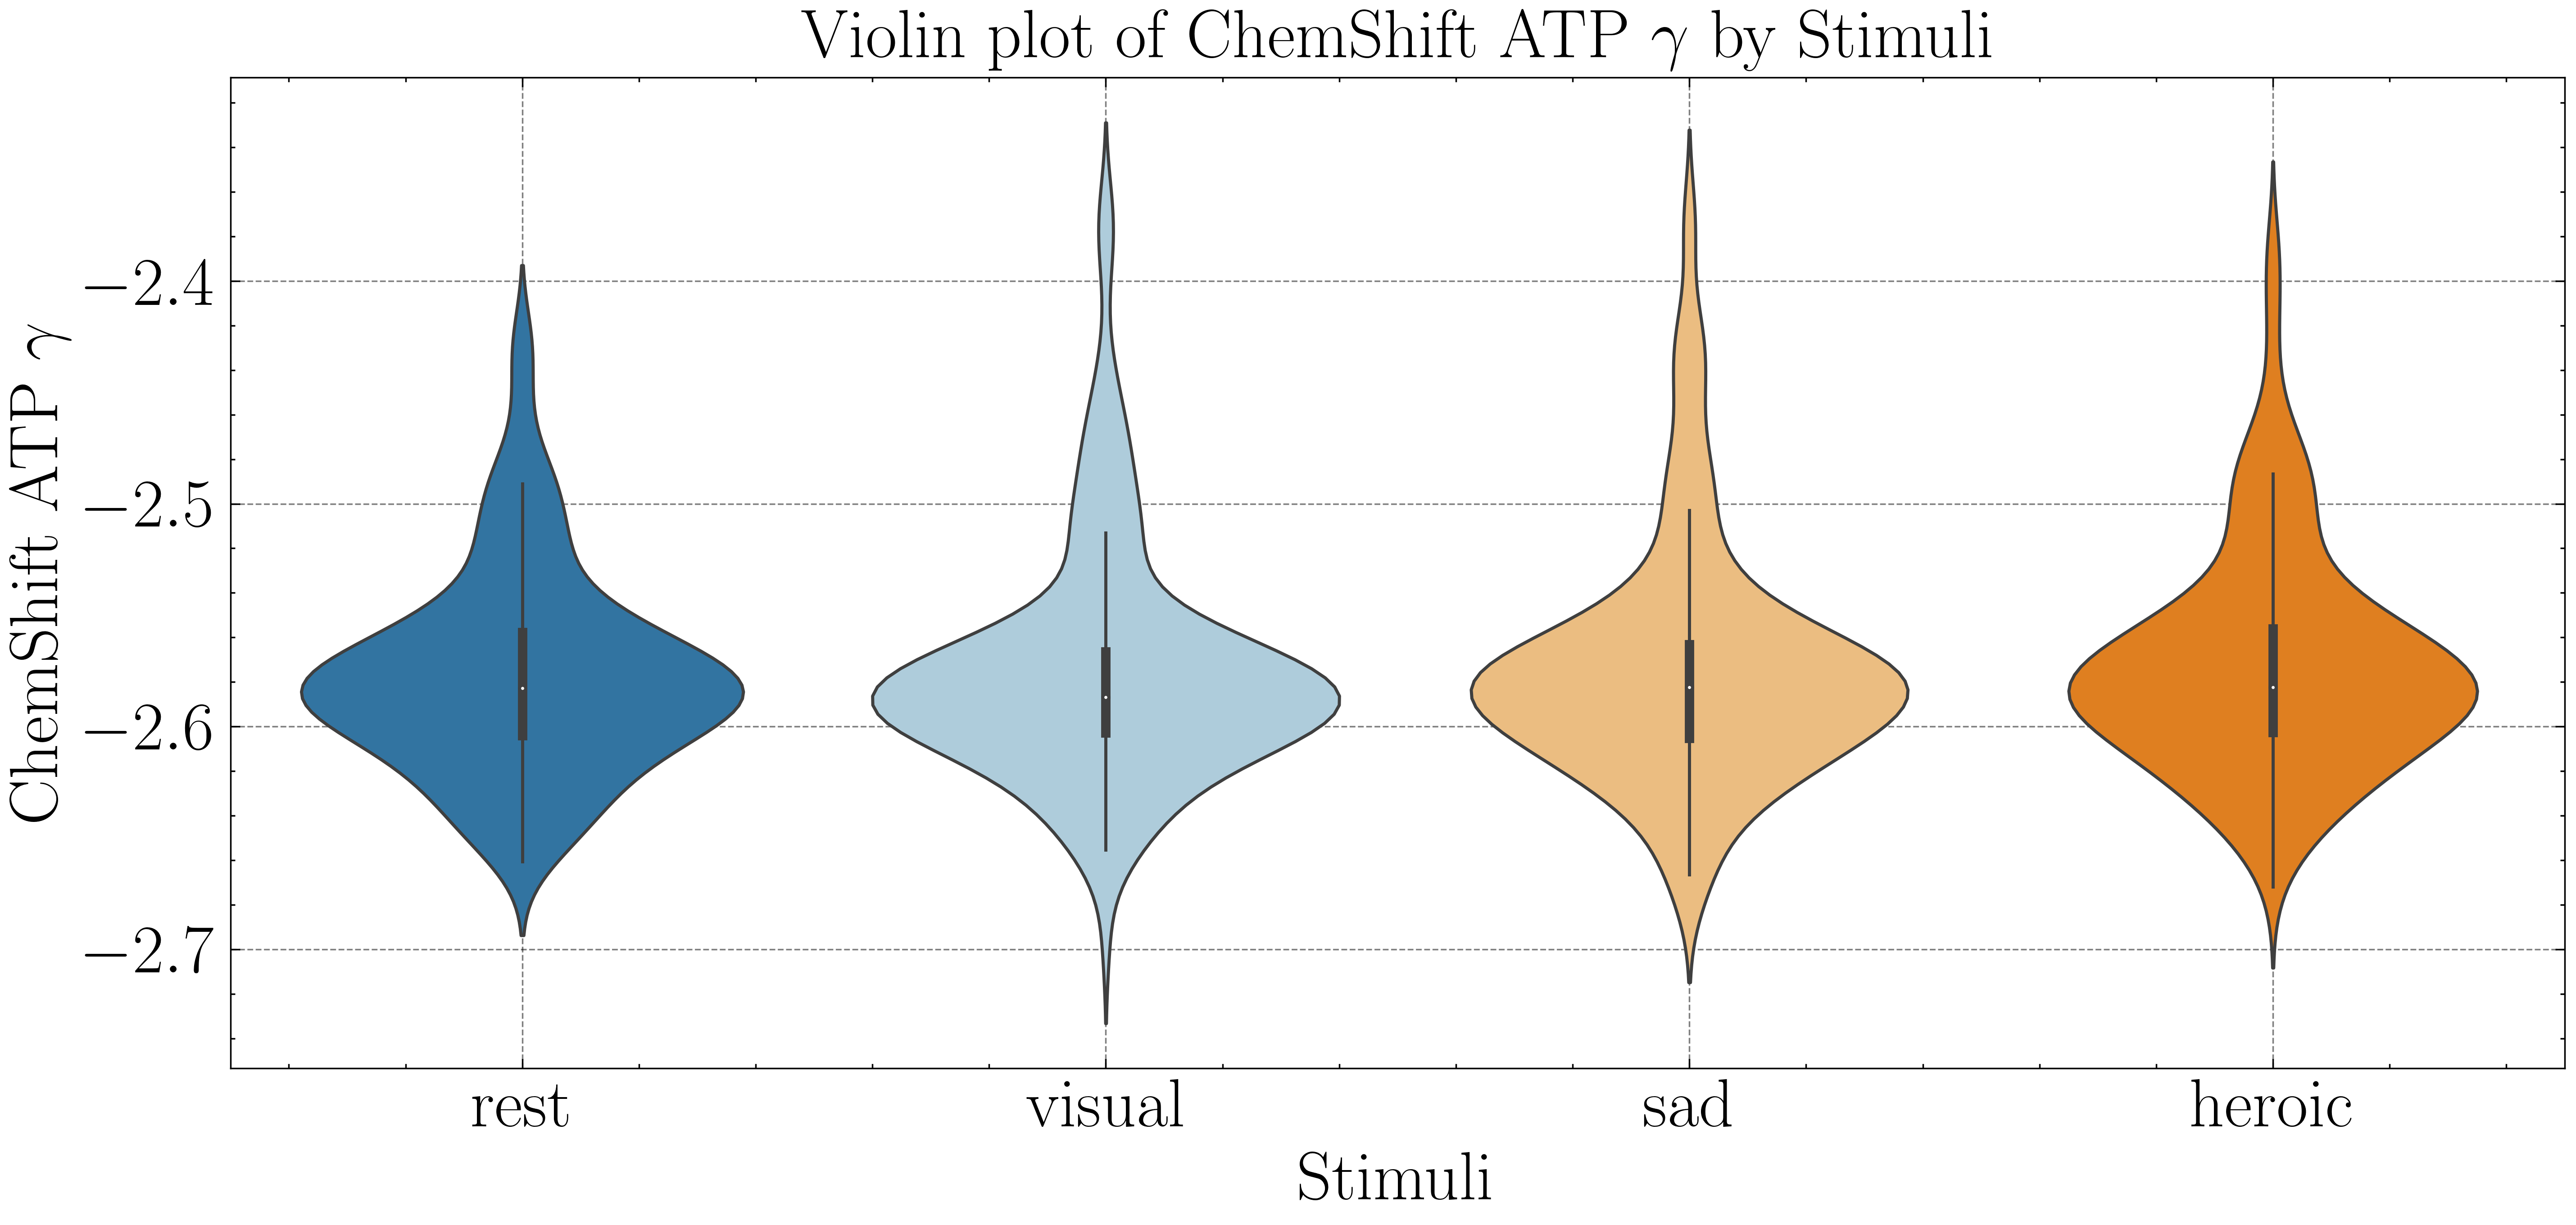

In [25]:
plt.figure(figsize=(12, 6))
sns.set_palette(custom_colors)
sns.violinplot(x='Stimuli', y='ChemShift_ATP_GAMMA1', data=df_subset)
plt.title('Violin plot of ChemShift ATP $\gamma$ by Stimuli')
plt.xlabel('Stimuli')
plt.ylabel('ChemShift ATP $\gamma$')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(save_path + '/boxplotATP_gamma.pdf')
plt.show()


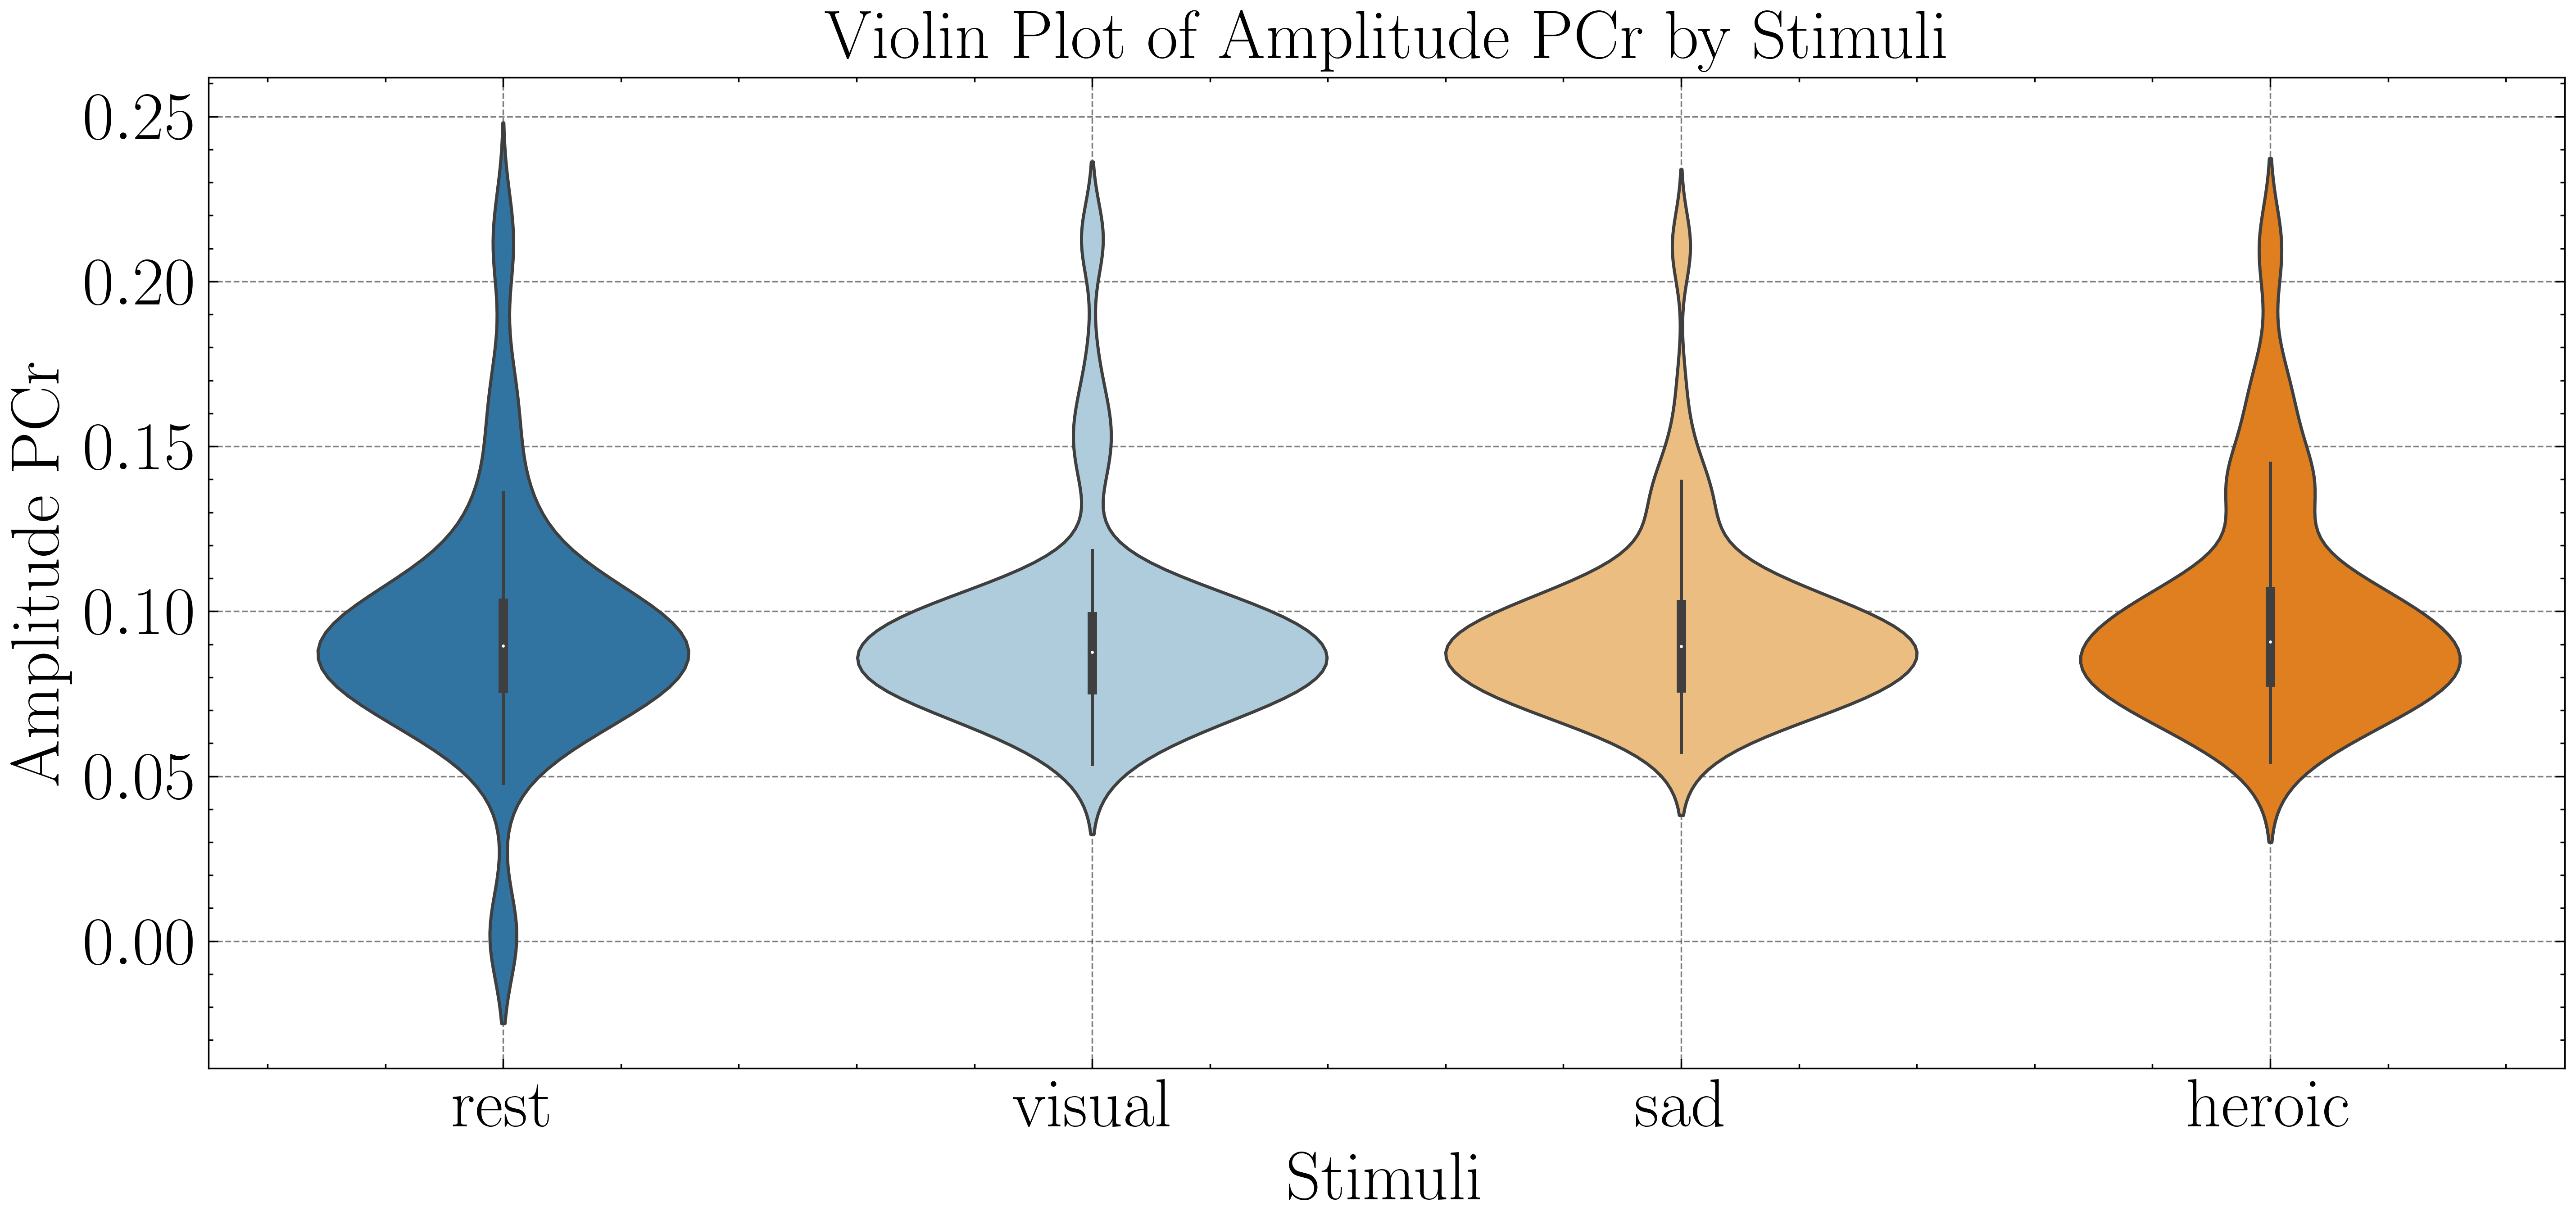

In [26]:
plt.figure(figsize=(12, 6))
sns.set_palette(custom_colors)
sns.violinplot(x='Stimuli', y='Ampl_PCR', data=df_subset)
plt.title('Violin Plot of Amplitude PCr by Stimuli')
plt.xlabel('Stimuli')
plt.ylabel('Amplitude PCr')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(save_path + '/boxplot_PCr.pdf')
plt.show()

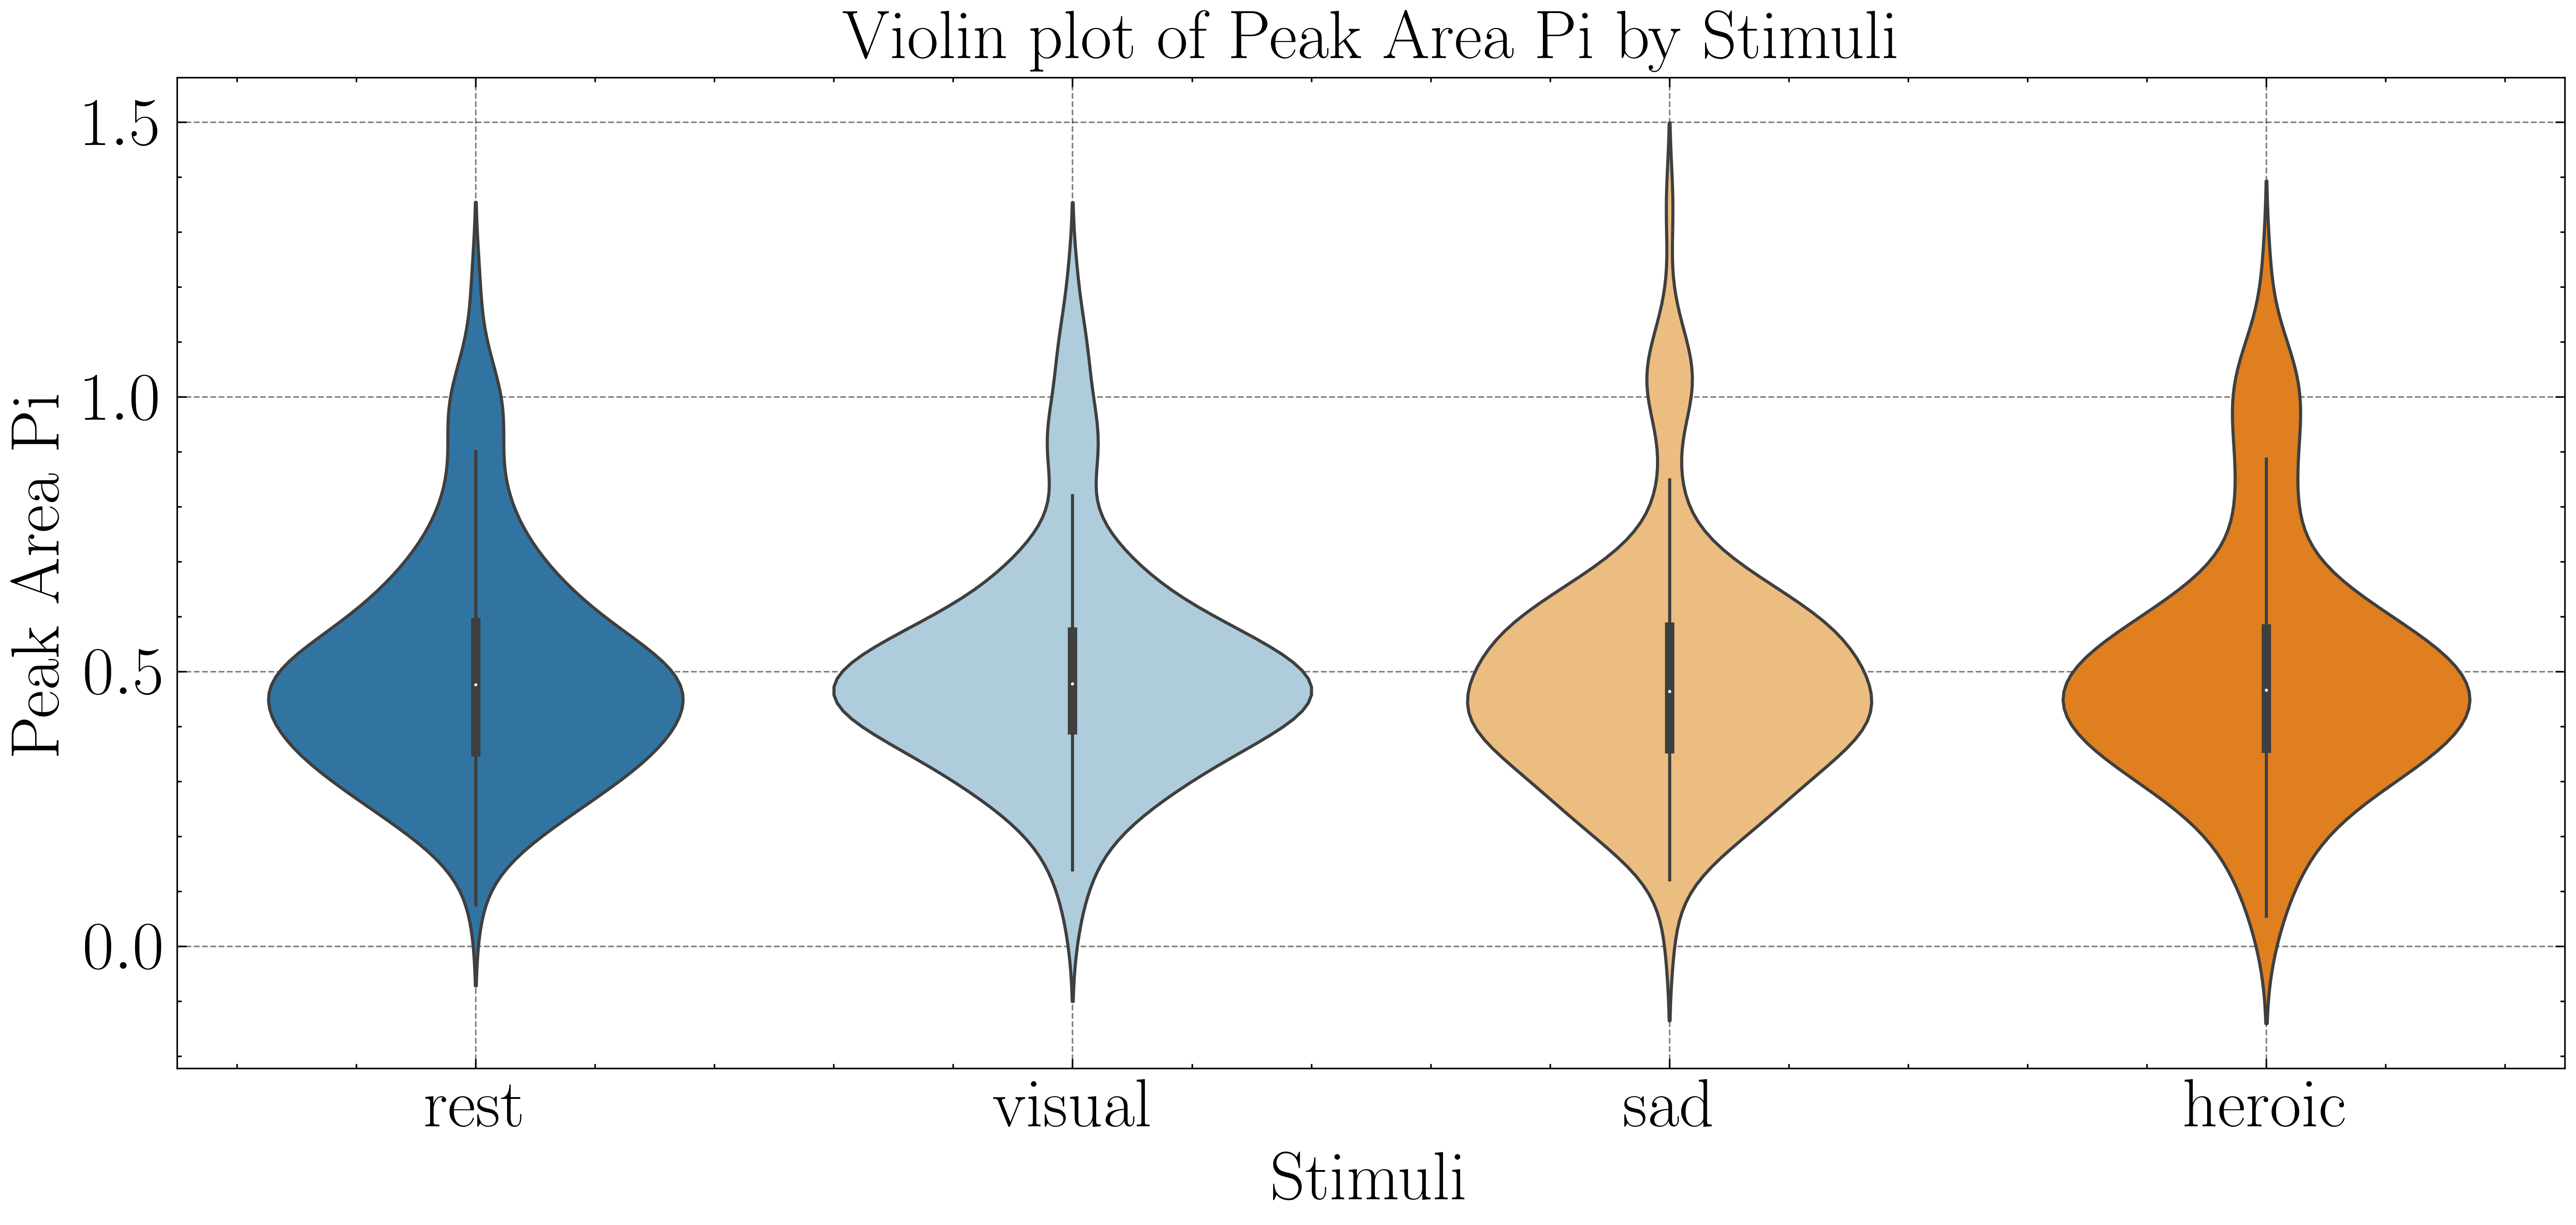

In [27]:

# Apply the custom colors to the plot
sns.set_palette(custom_colors)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Stimuli', y='PeakArea_PI', data=df_subset)
plt.title('Violin plot of Peak Area Pi by Stimuli')
plt.xlabel('Stimuli')
plt.ylabel('Peak Area Pi')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(save_path + '/boxplot_Pi.pdf')
plt.show()

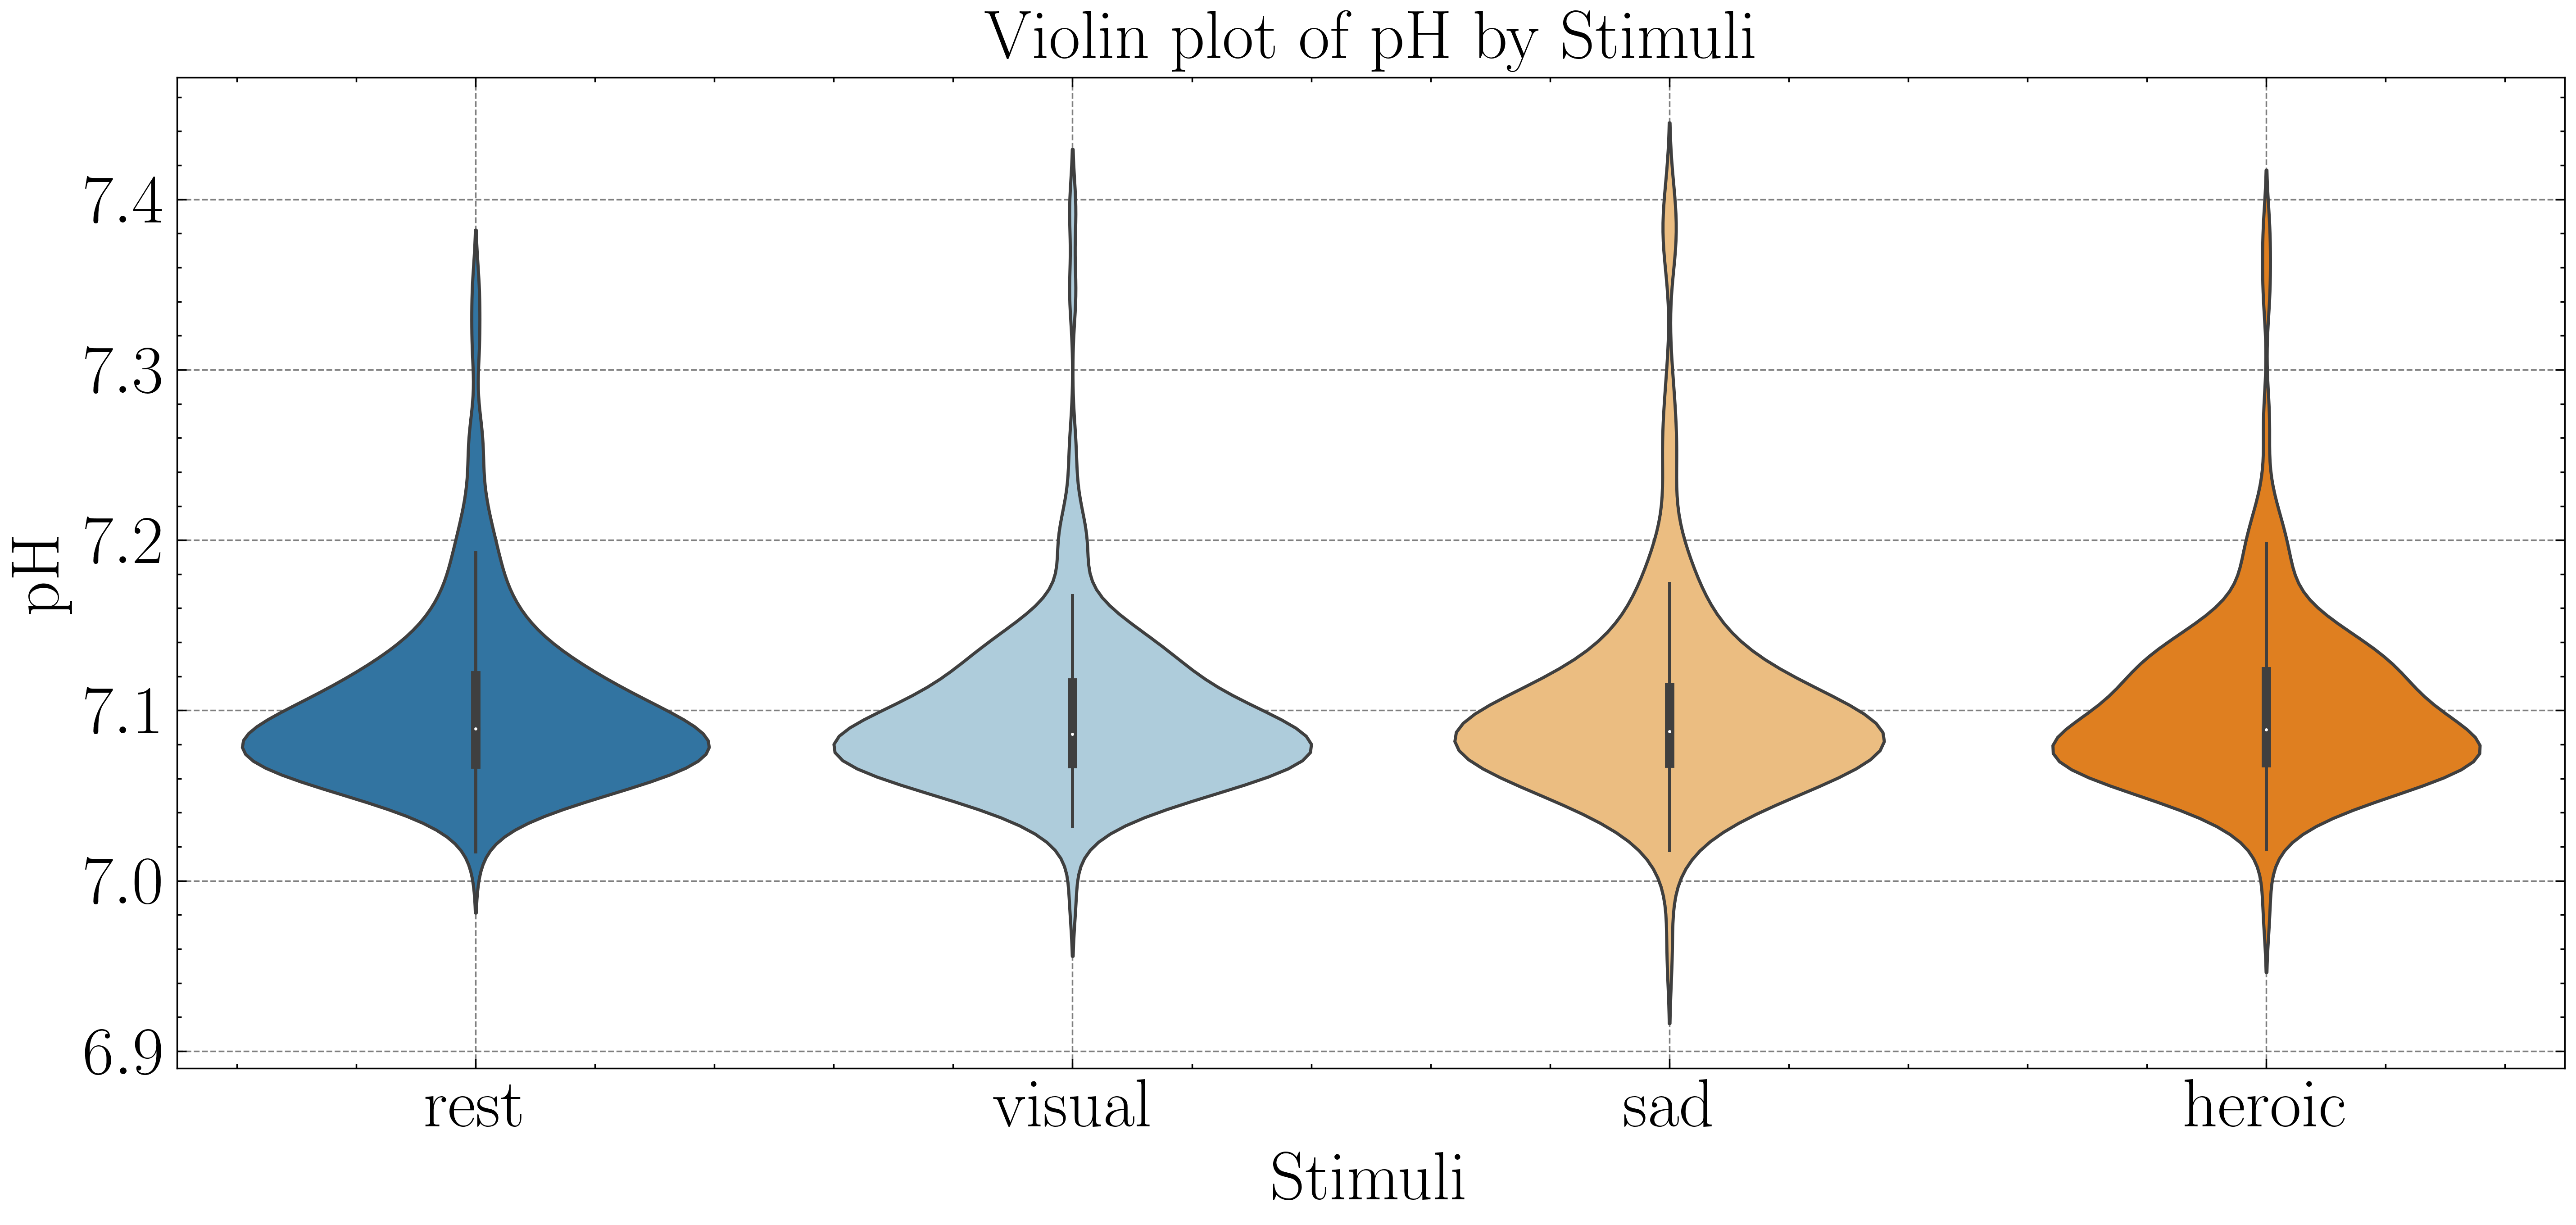

In [28]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Stimuli', y='ph', data=df_subset)
plt.title('Violin plot of pH by Stimuli')
plt.xlabel('Stimuli')
plt.ylabel('pH')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(save_path + '/boxplot_ph.pdf')
plt.show()

### Visulisation of series/stimuli

In [36]:
# Find all unique METAMUS and Stimuli
metamus_list = df_subset2['METAMUS'].unique()
stimuli_list = df_subset2['Stimuli'].unique()

# Dictionary to collect values by (stimulus, position)
occurrence_dict = defaultdict(list)

for metamus in metamus_list:
    df_m = df_subset2[df_subset2['METAMUS'] == metamus]
    for stim in stimuli_list:
        stim_rows = df_m[df_m['Stimuli'] == stim]
        # Only keep numeric values (exclude NaN and non-numeric)
        values = pd.to_numeric(stim_rows['PeakArea_ATP_GAMMA'], errors='coerce').dropna()
        for idx, val in enumerate(values):
            occurrence_dict[(stim, idx)].append(val)

# Now, for each (stimulus, position), compute the mean
result = []
for stim in stimuli_list:
    max_occ = max((idx for (s, idx) in occurrence_dict if s == stim), default=-1) + 1
    for pos in range(max_occ):
        values = occurrence_dict.get((stim, pos), [])
        if values:
            avg = np.mean(values)
            result.append({'Stimuli': stim, 'Position': pos+1, 'Mean_PeakArea_ATP_GAMMA': avg})

# Convert to DataFrame
df_stimulus_position_mean = pd.DataFrame(result)
df_stimulus_position_mean


,Stimuli,Position,Mean_PeakArea_ATP_GAMMA
0,rest,1,0.622383
1,rest,2,0.586218
2,rest,3,0.567285
3,rest,4,0.545682
4,rest,5,0.579648
5,rest,6,0.574185
6,visual,1,0.575640
7,visual,2,0.591654
8,visual,3,0.565215
9,visual,4,0.529127


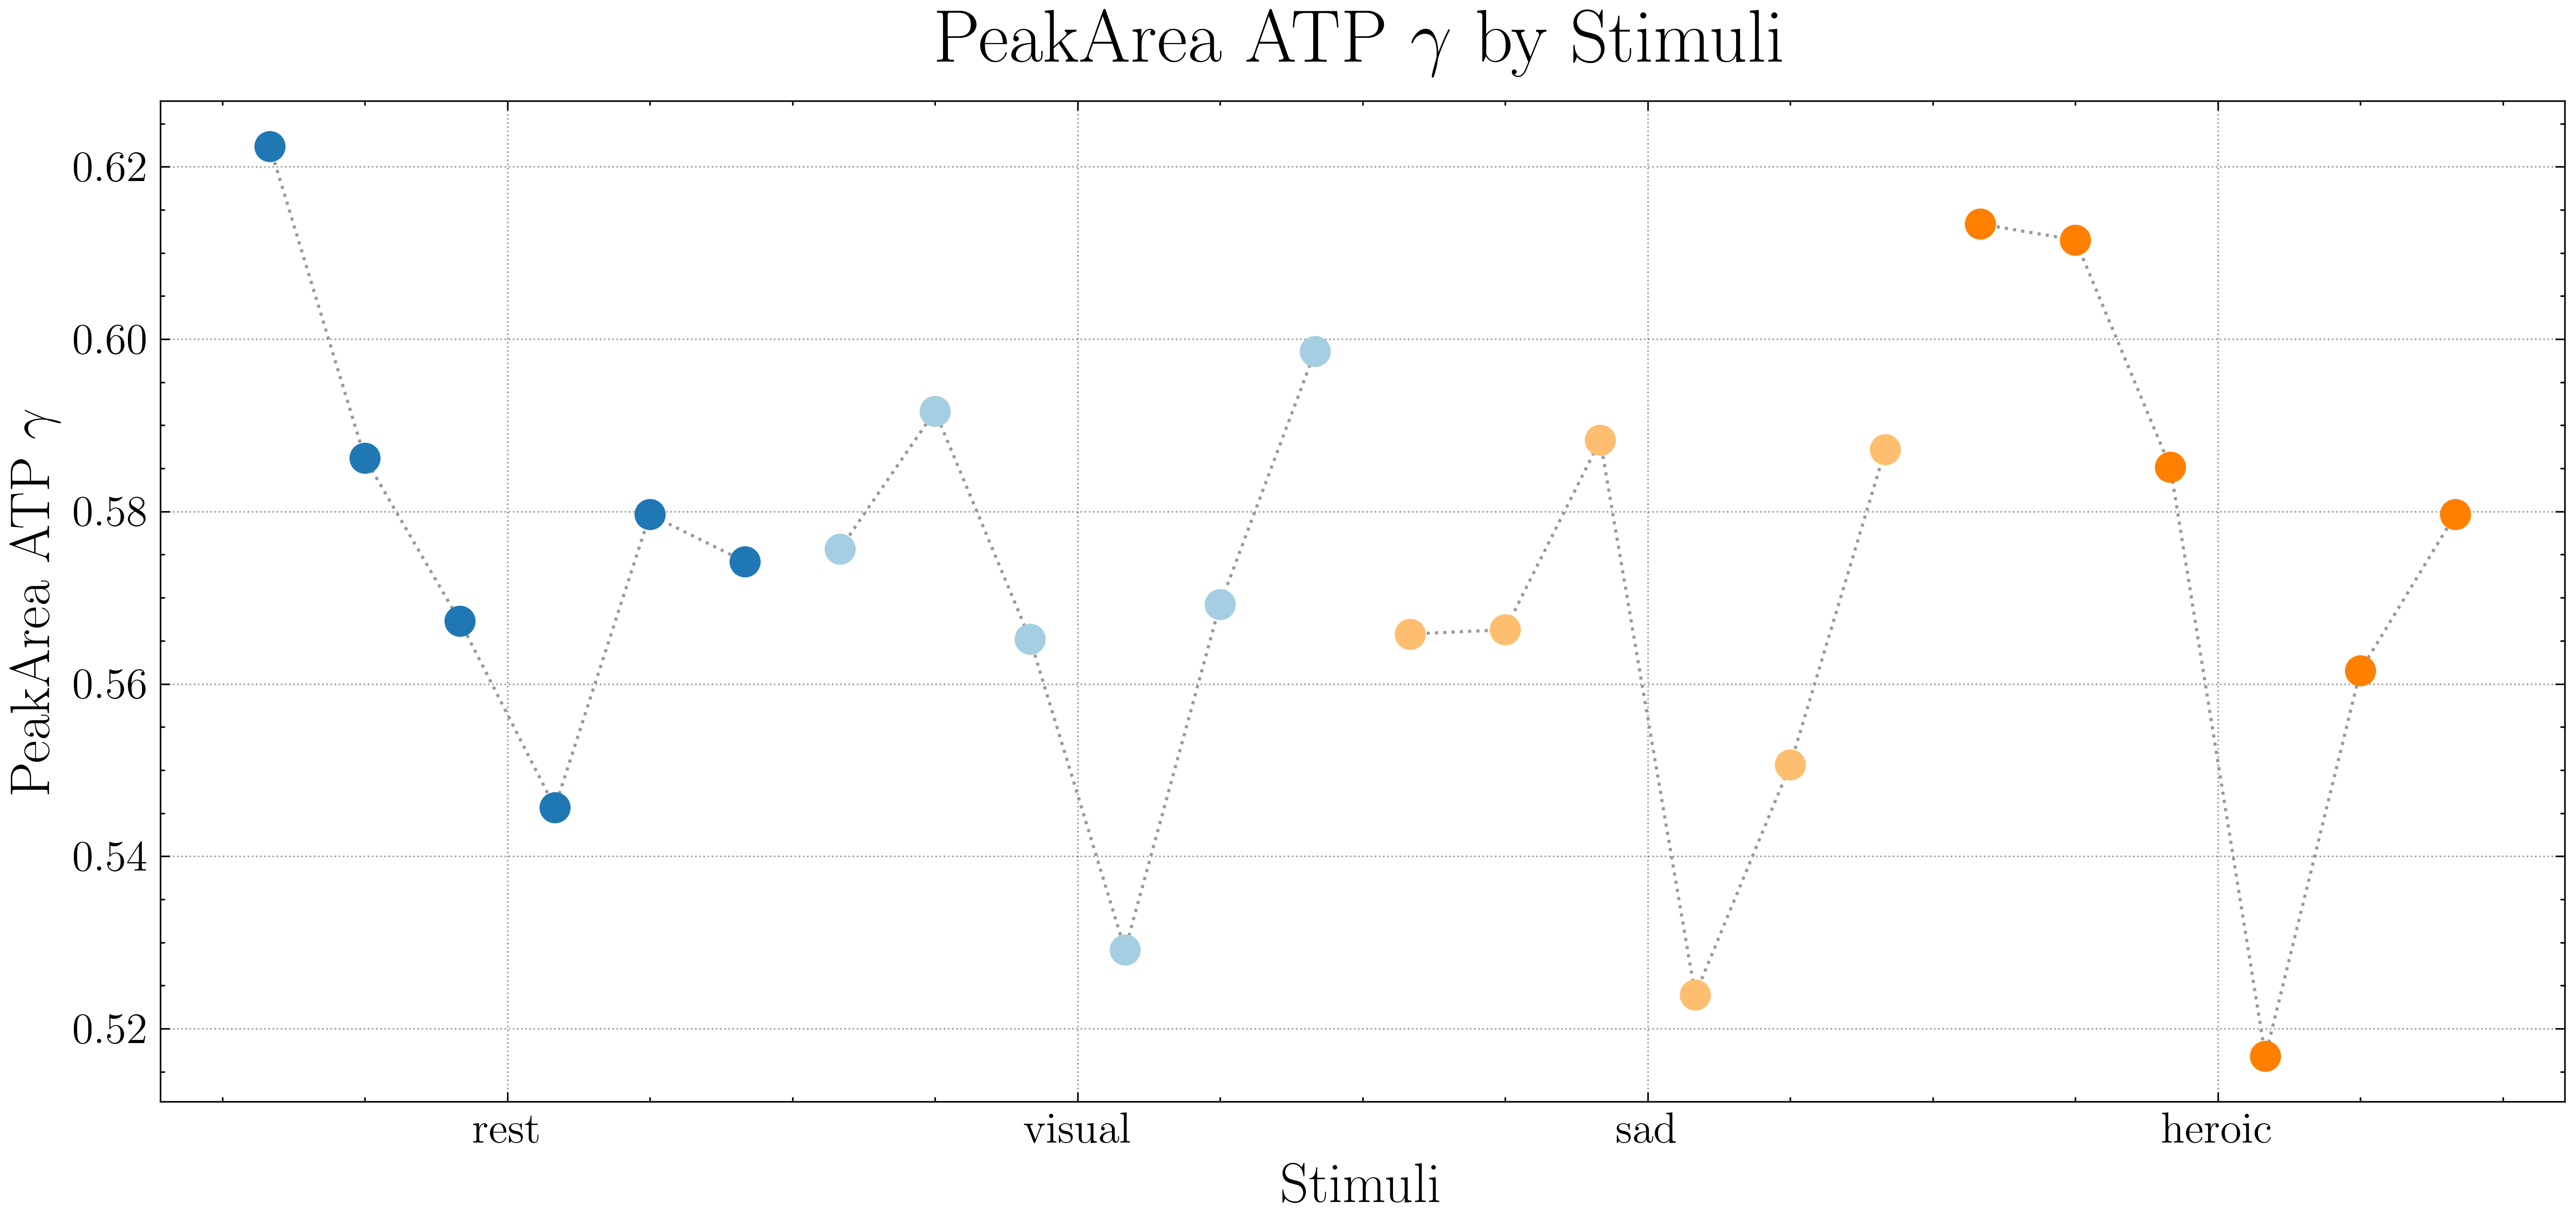

In [37]:
# Define a consistent colour palette
# Use seaborn's Paired palette for consistent coloring

cmap = dict(zip(['rest', 'visual', 'sad', 'heroic'], custom_colors))


# Sort dataframe by the order you want on the x-axis
order = ['rest', 'visual', 'sad', 'heroic']
df_sorted = df_stimulus_position_mean.set_index('Stimuli').loc[order].reset_index()

# Give every row a running index so we can join them with a line
df_sorted['x'] = np.arange(len(df_sorted))

# --- 4.  make the plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# Draw dotted lines only within each stimulus group (not between groups)
for stim in order:
    mask = df_sorted['Stimuli'] == stim
    ax.plot(df_sorted.loc[mask, 'x'],
            df_sorted.loc[mask, 'Mean_PeakArea_ATP_GAMMA'],
            linestyle=':',
            color='0.6',
            linewidth=1)

# one scatter call per stimulus for coloured markers
for stim in order:
    mask = df_sorted['Stimuli'] == stim
    ax.scatter(df_sorted.loc[mask, 'x'],
               df_sorted.loc[mask, 'Mean_PeakArea_ATP_GAMMA'],
               color=cmap[stim],
               s=80, zorder=3)

# --- 5.  tidy up axes ---
xtick_pos = [(df_sorted.loc[df_sorted['Stimuli'] == s, 'x'].mean()) for s in order]
ax.set_xticks(xtick_pos)
ax.set_xticklabels(order, fontsize=18)

ax.set_ylabel('PeakArea ATP $\gamma$ ', fontsize=18)
ax.set_xlabel('Stimuli', fontsize=18)
ax.set_title('PeakArea ATP $\gamma$ by Stimuli', fontsize=24, pad=12)

ax.grid(True, linestyle=':', alpha=0.4)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig(save_path + '/paGammaAll_stimuli.pdf')
plt.show()
